# Stat 133 Homework 6

In [91]:
library(DataComputing)
library(assertthat)
library(repr)

options(repr.plot.width=6.5, repr.plot.height=5)

## Problem 1

In [2]:
# Return if a year is a leap year
is_leap_year = function(y) {
    (y %% 4 == 0 & y %% 100 != 0) | y %% 400 == 0
}

assert_that(is_leap_year(2014) == F)
assert_that(is_leap_year(2016) == T)
assert_that(is_leap_year(1700) == F)

[1] TRUE

[1] TRUE

[1] TRUE

## Problem 2
### (a)

[1] "The portion is : 0.770000"

[1] "The approximated pi is 0.770000"

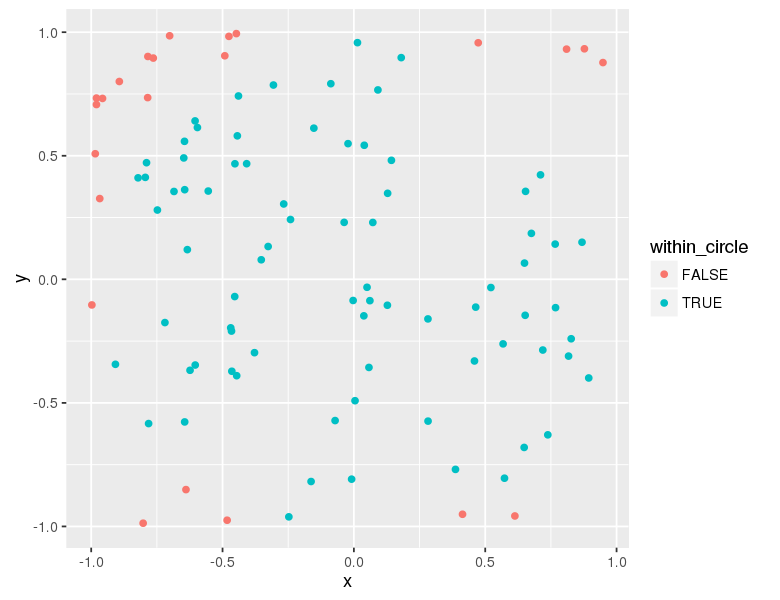

In [3]:
n_points = 100
x = runif(n_points, -1, 1)
y = runif(n_points, -1, 1)
portion = sum(x^2 + y^2 < 1) / n_points

# Portion
sprintf("The portion is : %f", portion)

plot_data = data.frame(x=x, y=y, within_circle=x^2 + y^2 < 1)
ggplot(plot_data, aes(x=x, y=y, col=within_circle)) +
    geom_point()

sprintf("The approximated pi is %f", portion)

### (b)

In [4]:
approximate_pi = function(n=1000, plotit=F) {
    x = runif(n, -1, 1)
    y = runif(n, -1, 1)
    portion = sum(x^2 + y^2 < 1) / n

    if (plotit) {
        plot_data = data.frame(x=x, y=y, within_circle=x^2 + y^2 < 1)
        plt = ggplot(plot_data, aes(x=x, y=y, col=within_circle)) +
            geom_point()
        return(list(portion * 4, plt))
    }
    
    return(portion * 4)
}

[[1]]
[1] 3.128

[[2]]



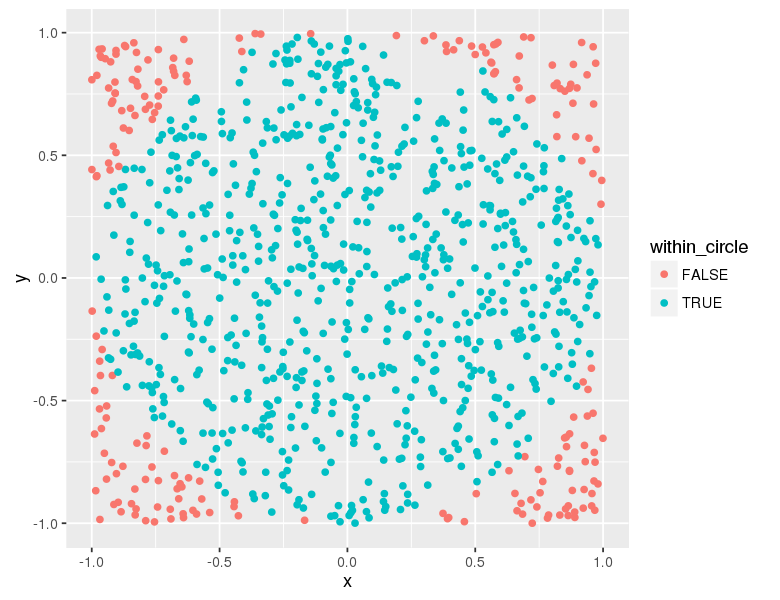

In [5]:
print(approximate_pi(1000, T))

### (c)

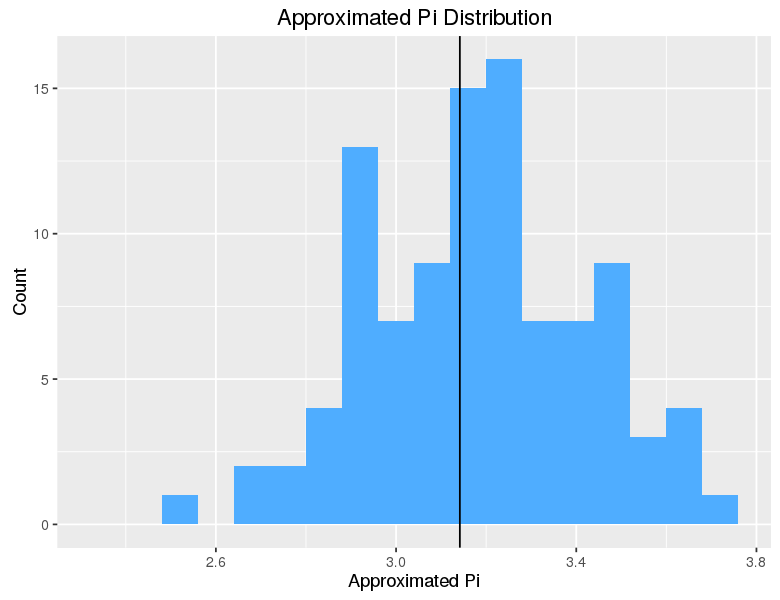

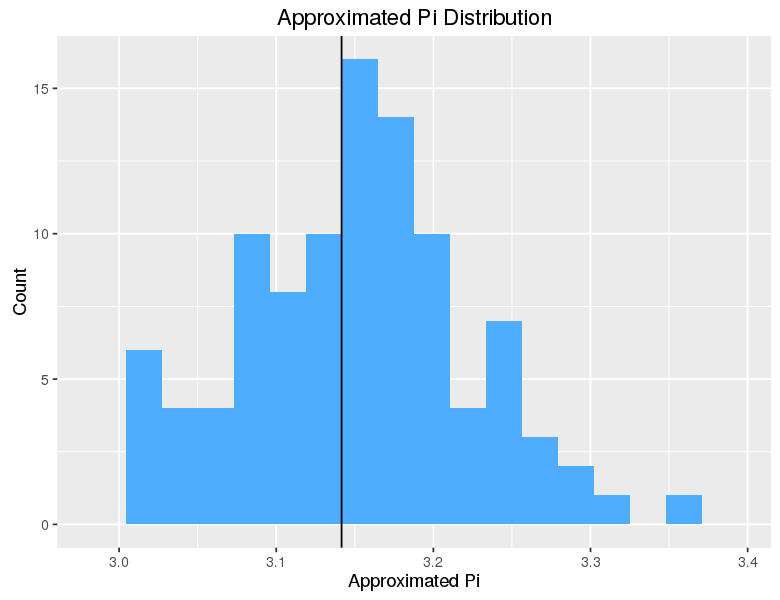

In [6]:
pi_50 = replicate(100, approximate_pi(n=50))
pi_500 = replicate(100, approximate_pi(n=500))

ggplot(data.frame(x=pi_50), aes(x=x)) +
    geom_histogram(bins=15, fill="#4FADFF") +
    geom_vline(xintercept=pi) +
    xlab("Approximated Pi") +
    ylab("Count") +
    ggtitle("Approximated Pi Distribution")
    
ggplot(data.frame(x=pi_500), aes(x=x)) +
    geom_histogram(bins=15, fill="#4FADFF") +
    geom_vline(xintercept=pi) +
    xlab("Approximated Pi") +
    ylab("Count") +
    ggtitle("Approximated Pi Distribution")

## Problem 2
### (a)

In [47]:
# Newton's method
newtonsmethod = function(init_guess=0, fx, fpx, tol=1e-10, max_iter=200) {
    if (abs(fx(init_guess)) < tol | max_iter <= 0) {
        init_guess
    } else {
        newtonsmethod(
            init_guess - fx(init_guess) / fpx(init_guess),
            fx, fpx, tol, max_iter - 1
        )
    }
}

# Plot function
plot_function = function(f, x_min=-5, x_max=5, n_points=1000) {
    x = seq(x_min, x_max, length=n_points)
    y = f(x)
    df = data.frame(x, y)
    ggplot(df, aes(x=x, y=y)) + geom_path(col="blue")
    
}

# Return the iteration path
newtonsmethod_path = function(init_guess=0, fx, fpx, tol=1e-10, max_iter=500) {
    if (abs(fx(init_guess)) < tol | max_iter <= 0) {
        init_guess
    } else {
        c(
            init_guess,
            newtonsmethod_path(
                init_guess - fx(init_guess) / fpx(init_guess),
                fx, fpx, tol, max_iter - 1
            )
        )
    }
}

In [50]:
newtonsmethod_for_this_function = function(init_guess=0, tol=1e-10) {
    newtonsmethod(
        init_guess=init_guess,
        fx=function(x) x^3 + 2 * x^2 - 7,
        fpx=function(x) 3 * x^2 + 4 * x,
        tol=tol
    )
}

newtonsmethod_for_this_function(init_guess=10)

[1] 1.428818

### (b)

In [51]:
fx=function(x) x^3 + 2 * x^2 - 7
fpx=function(x) 3 * x^2 + 4 * x

### (c)

In [52]:
newtonsmethod(init_guess=10, fx=fx, fpx=fpx)

[1] 1.428818

### (d)

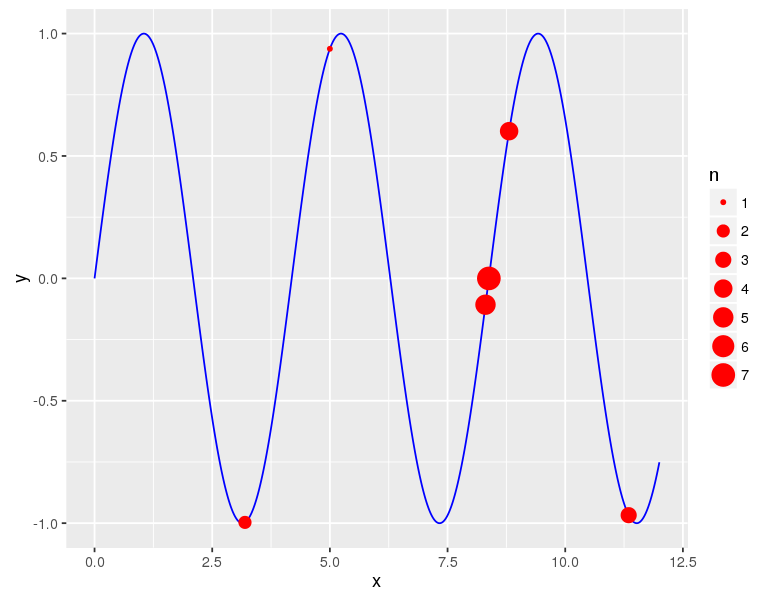

In [92]:
fx=function(x) sin(1.5 * x)
fpx=function(x) 1.5 * cos(1.5 * x)
path = newtonsmethod_path(init_guess=5, fx=fx, fpx=fpx, max_iter=50)
path_df = data.frame(x=path, y=fx(path), n=1:length(path))
plot_function(fx, 0, 12) + geom_point(data=path_df, aes(x=x, y=y, size=n), color="red")